In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
x_ = np.array([0.747264, 0.806094, 0.741519, 0.723471, 0.777587, 0.725995, 0.834896, 0.722248, 0.767785])
y_ = np.array([90.93342 , 91.614726, 88.184657, 88.817481, 90.1086  , 87.924487, 91.501665, 88.508865, 88.731781])

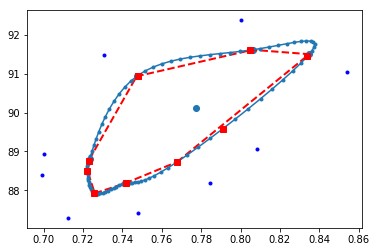

In [3]:
from scipy.spatial import ConvexHull
from scipy.interpolate import CubicSpline, UnivariateSpline

import itertools

plt.scatter(x_, y_)

points = np.array([x_, y_]).T
hull = ConvexHull(points)

vertices = list(hull.vertices)
vertices.insert(0, vertices[-1])
#vertices.append(vertices[1])

x_h, y_h = points[vertices,0], points[vertices,1]

plt.plot(x_h, y_h, 'r--', lw=2)

def make_t(x, y):
    t = np.arange(x.shape[0], dtype=float)
    t /= t[-1]
    return t

t = make_t(x_h, y_h)
nt = np.linspace(0, 1, 100)

cs_x = CubicSpline(t, x_h, bc_type='periodic')
cs_y = CubicSpline(t, y_h, bc_type='periodic')

x_s = cs_x(nt)
y_s = cs_y(nt)

#x_s = scipy.interpolate.spline(t, x_h, nt)
#y_s = scipy.interpolate.spline(t, y_h, nt)

plt.plot(x_s, y_s, marker='.')

scale = 0.2

points_s = np.array([x_s, y_s]).T

lx, ly = np.max(x_s)-np.min(x_s), np.max(y_s)-np.min(y_s)

for n in range(len(x_)):
    point = points[n]
    
    dist_xy = point - points_s
    dist_xy[:,0] /= lx
    dist_xy[:,1] /= ly
    
    dists = np.linalg.norm(dist_xy, axis=-1)
    k = np.argmin(dists)
    
    point_nearest = points_s[k]
    
    plt.plot(point_nearest[0], point_nearest[1], marker='s', color='red')
    
    d = points_s[k+1] - points_s[k-1]
    d[0] /= lx
    d[1] /= ly
    d = np.array([d[1], -d[0]])
    d /= np.linalg.norm(d)
    
    d[0] *= scale*lx
    d[1] *= scale*ly
    
    point_outside = point_nearest + d
    
    plt.plot(point_outside[0], point_outside[1], marker='.', color='blue')


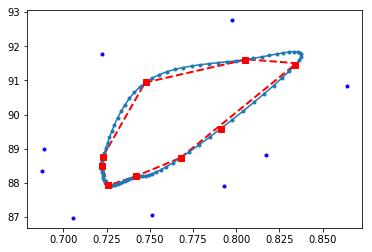

In [5]:
def calc_point_offsets(points, scale=0.2, show_plot=False):
    points = np.array([x_, y_]).T
    hull = ConvexHull(points)

    vertices = list(hull.vertices)
    vertices.insert(0, vertices[-1])

    x_h, y_h = points[vertices,0], points[vertices,1]

    if show_plot:
        plt.plot(x_h, y_h, 'r--', lw=2)

    def make_t(x, y):
        t = np.arange(x.shape[0], dtype=float)
        t /= t[-1]
        return t

    t = make_t(x_h, y_h)
    nt = np.linspace(0, 1, 100)

    cs_x = CubicSpline(t, x_h, bc_type='periodic')
    cs_y = CubicSpline(t, y_h, bc_type='periodic')

    x_s = cs_x(nt)
    y_s = cs_y(nt)

    if show_plot:
        plt.plot(x_s, y_s, marker='.')

    points_s = np.array([x_s, y_s]).T

    lx, ly = np.max(x_s)-np.min(x_s), np.max(y_s)-np.min(y_s)
    
    offset_points = []

    for n in range(len(x_)):
        point = points[n]

        dist_xy = point - points_s
        dist_xy[:,0] /= lx
        dist_xy[:,1] /= ly

        dists = np.linalg.norm(dist_xy, axis=-1)
        k = np.argmin(dists)

        point_nearest = points_s[k]

        plt.plot(point_nearest[0], point_nearest[1], marker='s', color='red')

        d = points_s[k+1] - points_s[k-1]
        d[0] /= lx
        d[1] /= ly
        d = np.array([d[1], -d[0]])
        d /= np.linalg.norm(d)

        d[0] *= scale*lx
        d[1] *= scale*ly

        point_outside = point_nearest + d

        if show_plot:
            plt.plot(point_outside[0], point_outside[1], marker='.', color='blue')
        
        offset_points.append(point_outside)
        
    return np.array(offset_points)

pts_offset = calc_point_offsets(np.array([x_, y_]).T, show_plot=True, scale=0.3)

In [8]:
pts_offset

array([[ 0.72241866, 91.75850967],
       [ 0.79773418, 92.75932702],
       [ 0.75105485, 87.05160468],
       [ 0.68909309, 89.00189335],
       [ 0.81716576, 88.80893972],
       [ 0.70543842, 86.97344667],
       [ 0.86375709, 90.83958238],
       [ 0.68778784, 88.35101251],
       [ 0.79267796, 87.90889185]])

In [9]:
np.array([x_, y_]).T

array([[ 0.747264, 90.93342 ],
       [ 0.806094, 91.614726],
       [ 0.741519, 88.184657],
       [ 0.723471, 88.817481],
       [ 0.777587, 90.1086  ],
       [ 0.725995, 87.924487],
       [ 0.834896, 91.501665],
       [ 0.722248, 88.508865],
       [ 0.767785, 88.731781]])